***Question 0:***

The function given to us in the assignment can be strongly reduced. Step by step, we find that the function is logically equivalent to $$f(x_0, x_1, x_2, x_3, x_4) = (\neg x_1 \land \neg x_2 \land x_3 \land \neg x_4) \lor (\neg x_0 \land \neg x_2 \land x_3 \land \neg x_4)$$


The function takes value 1 for the following 3 inputs : $(0, 0, 0, 1, 0), (0, 1, 0, 1, 0), (1, 1, 0, 1, 0)$

***Question 1:***


Since there are fives $x_i$'s, and 6 clauses, and we will need a qubit for each of them, plus the final ancilla qubit that will take the xor of itself with the whole addition, we will need 12 qubits. We prepare the circuit with a Hadamard gate for all the qubits that are going to be our input, i.e. the first 5 qubits.

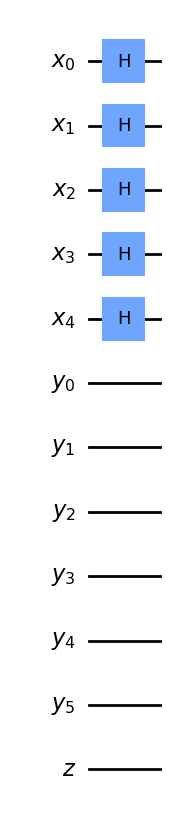

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_x = QuantumRegister(5, 'x')
qreg_y = QuantumRegister(6, 'y')
qreg_z = QuantumRegister(1, 'z')
circuit = QuantumCircuit(qreg_x, qreg_y, qreg_z)

circuit.h(qreg_x[0])
circuit.h(qreg_x[1])
circuit.h(qreg_x[2])
circuit.h(qreg_x[3])
circuit.h(qreg_x[4])
circuit.draw('mpl')

In [2]:
Prep = QuantumCircuit(12, name='Prep')
Prep.h(0)
Prep.h(1)
Prep.h(2)
Prep.h(3)
Prep.h(4)


***Question 2:***

The first clause $(\neg x_0 \lor x_1)$ becomes $\neg(x_0 \land \neg x_1)$. Therefor we need to invert $x_1$ and then we will use a CCNOT to bind this to $y_0$

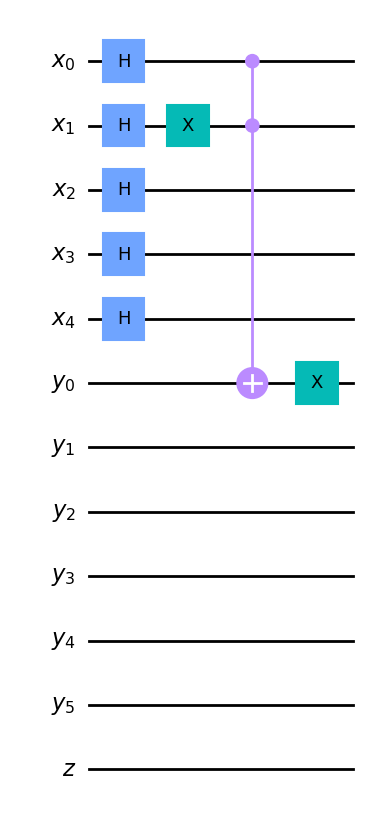

In [3]:
circuit.x(qreg_x[1])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_y[0])
circuit.draw('mpl')

The second clause, $(x_0 \lor x_1 \lor \neg x_2)$ becomes $\neg(\neg x_0 \land \neg x_1 \land x_2)$. We proceed analogously to the first clause on the circuit

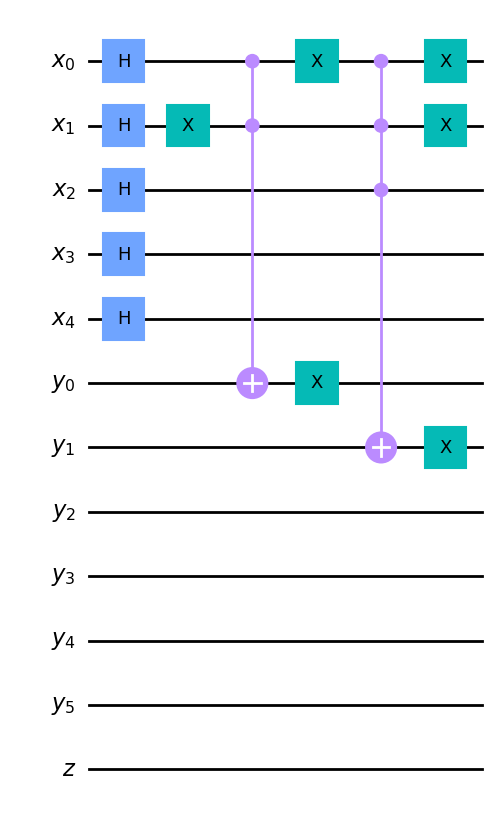

In [4]:
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_x[1])
circuit.x(qreg_y[1])
circuit.draw('mpl')

The third clause transform as $(x_2 \lor x_3) \rightarrow \neg(\neg x_2 \land \neg x_3)$

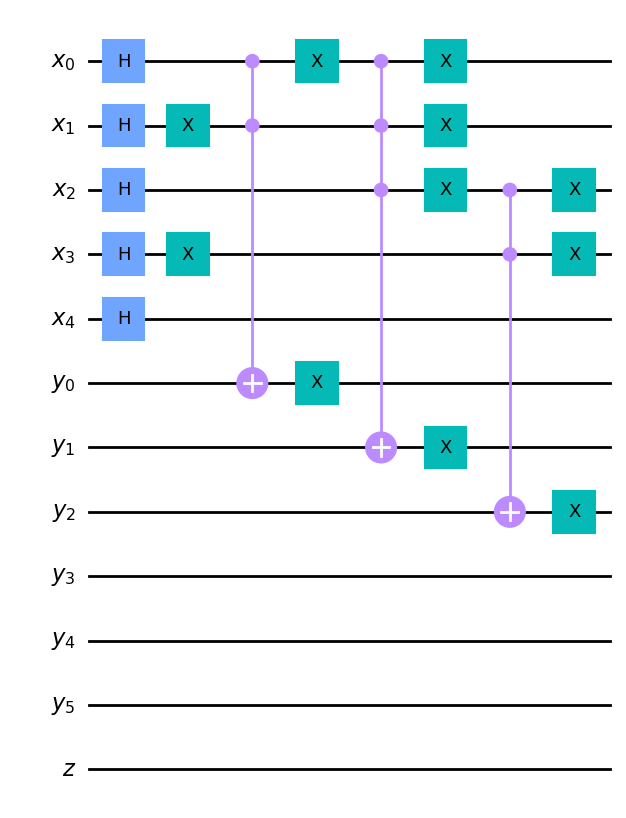

In [5]:
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.draw('mpl')

4th clause: $(\neg x_1 \lor \neg x_2 \lor x_3) \rightarrow \neg(x_1 \land x_2 \land \neg x_3)$

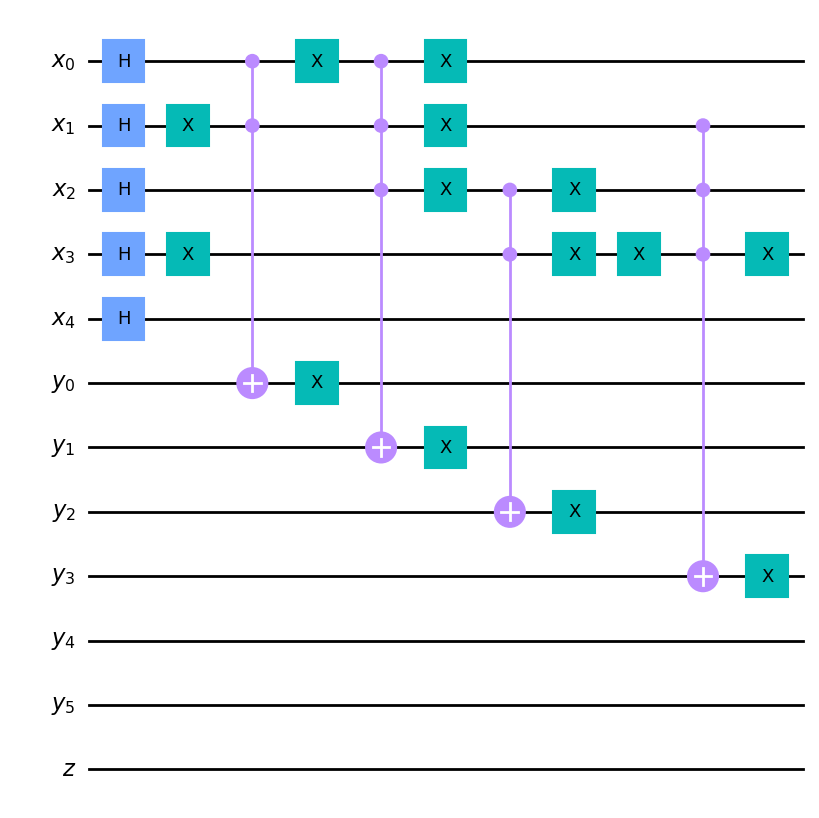

In [6]:
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[3])
circuit.draw('mpl')

5th clause : $(\neg x_3 \lor \neg x_4) \rightarrow \neg(x_3 \land x_4)$

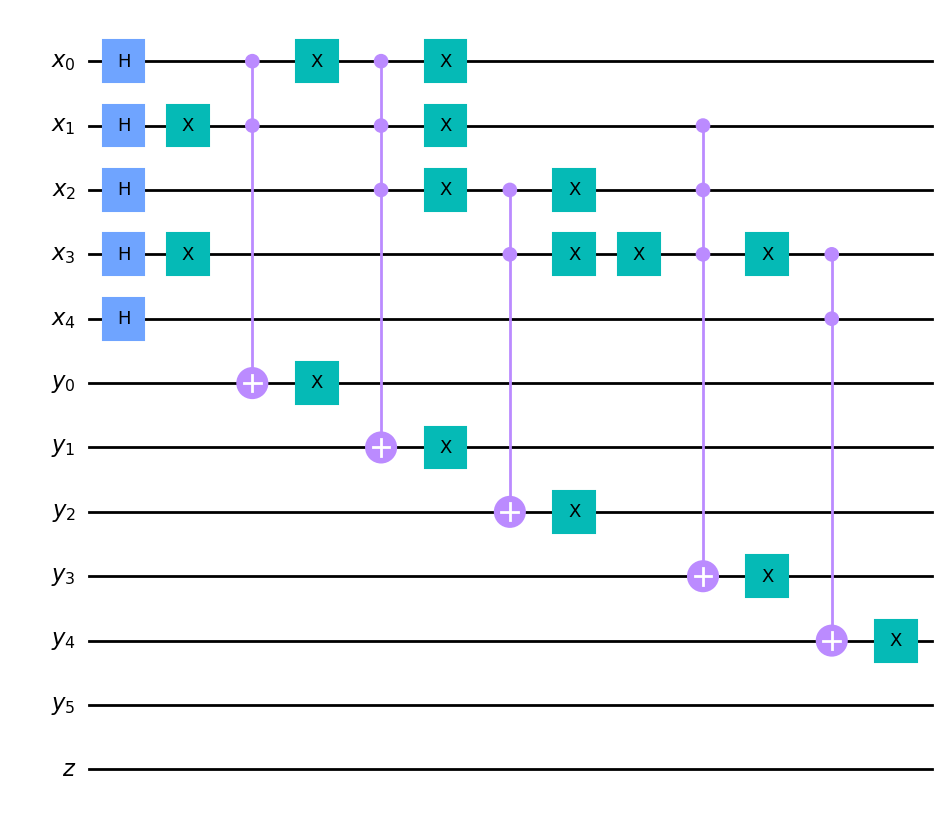

In [7]:
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[4])
circuit.draw('mpl')

6th clause : $(\neg x_2 \lor \neg x_3 \lor x_4) \rightarrow \neg(x_2 \land x_3 \land \neg x_4)$

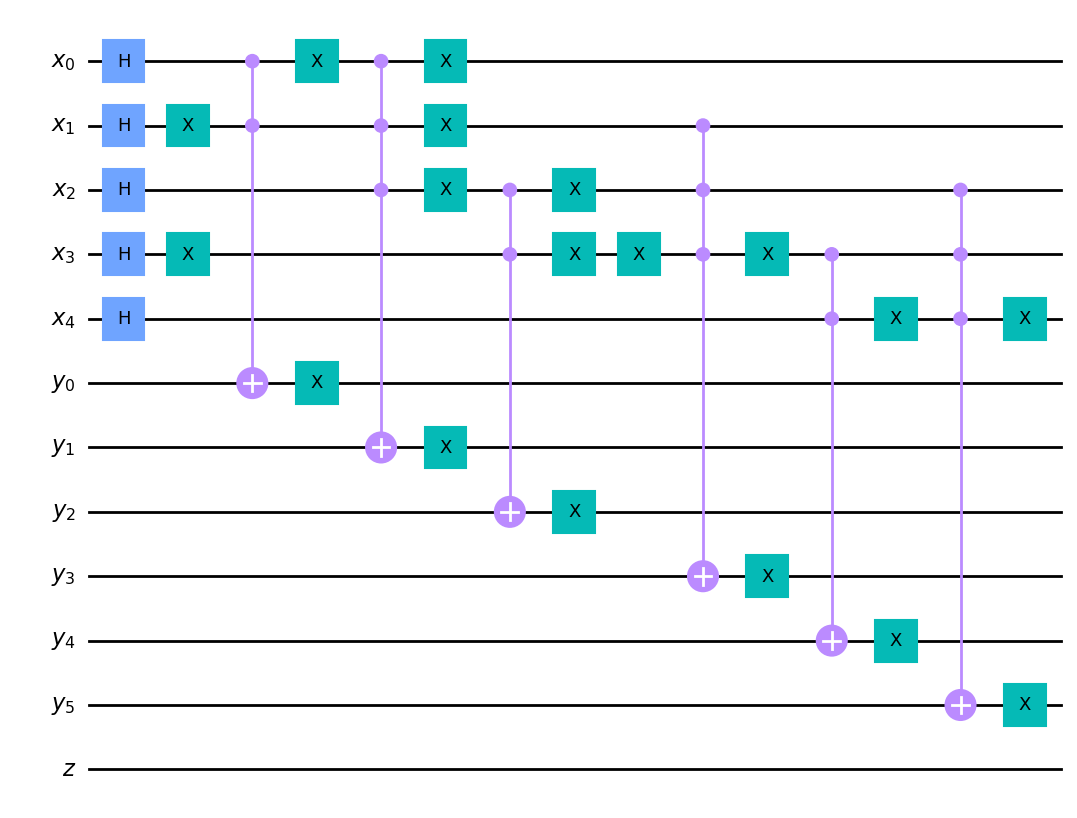

In [8]:
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[5])
circuit.draw('mpl')

Now we use a multicontrol not of all 6 $y_i$'s onto z

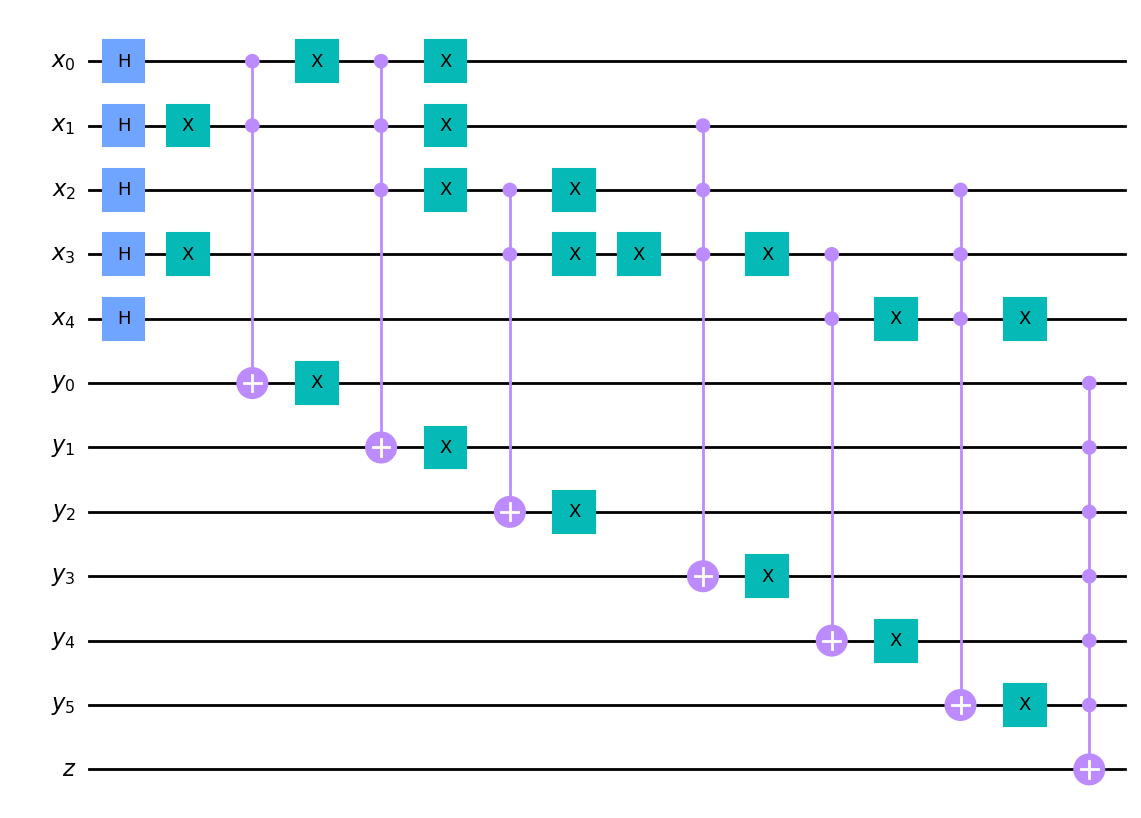

In [9]:
circuit.mcx(qreg_y[0:6], qreg_z[0])
circuit.draw('mpl')

Now we need to go back on all registers except for the z one to return to normal state. This can be achieved by merely applying the same gates again to the same bits, as both the X and the multicontrol not gate are their own inverse. We can do this all in one in the next cell.

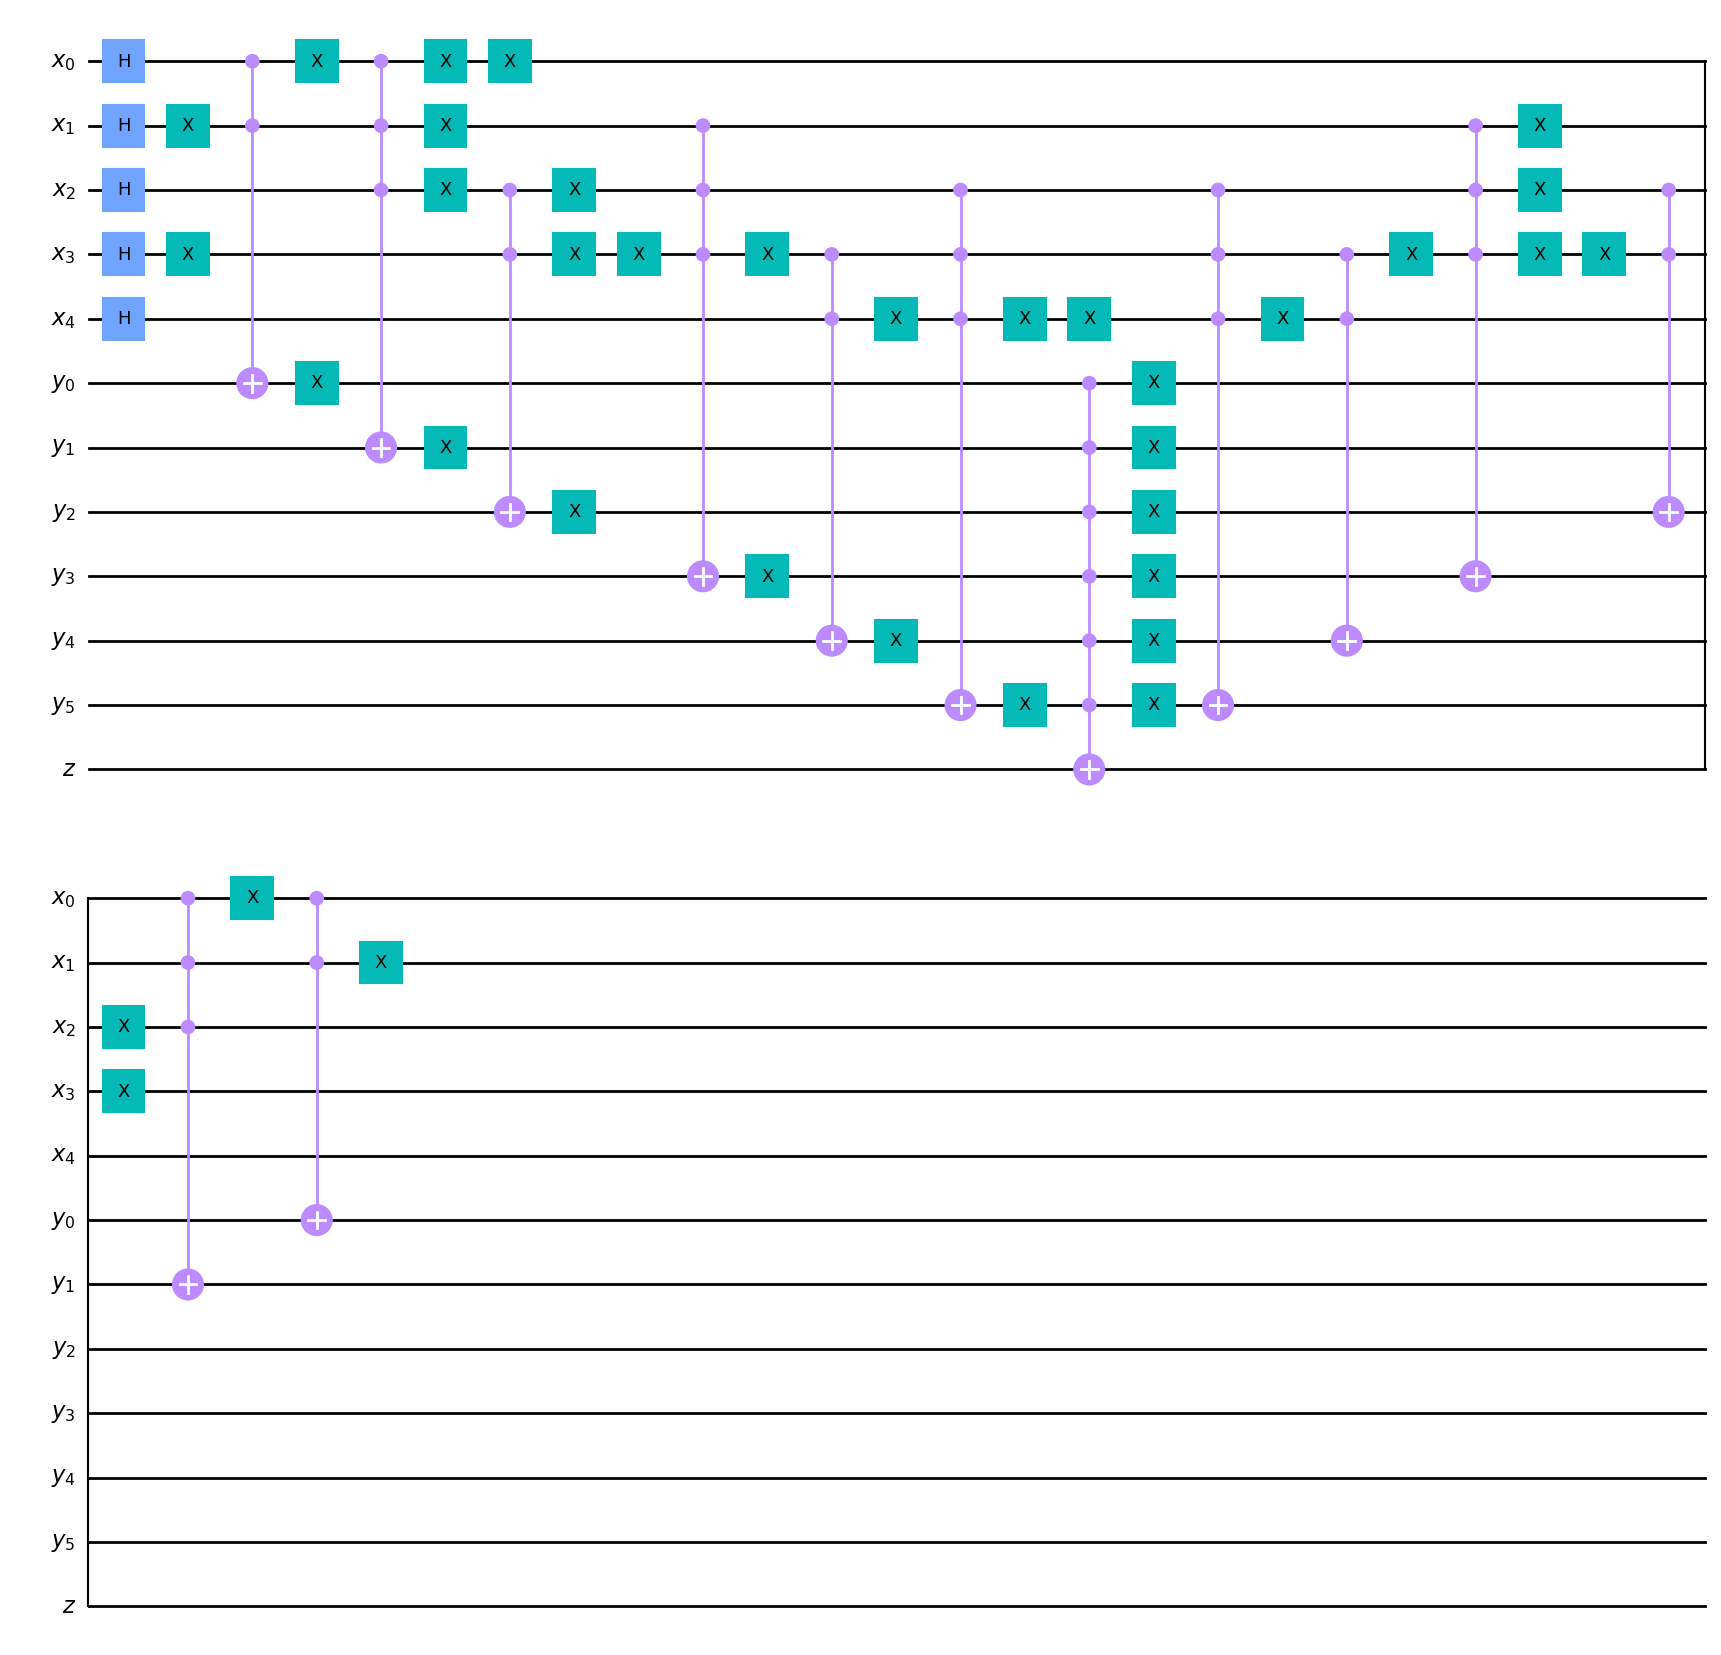

In [10]:
circuit.x(qreg_y[5])
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[4])
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[3])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.x(qreg_y[1])
circuit.x(qreg_x[1])
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_y[0])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_x[1])
circuit.draw('mpl')

As the Algorithm will apply this transformation multiple times, it is best to create this as its own function, that takes as input a circuit, that is already existant, and attaches the oracle gate $U_f$ to it.

In [11]:
def uf(circuit, qreg_x, qreg_y, qreg_z):
    circuit.x(qreg_x[1])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_y[0])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[3])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[4])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[5])
    circuit.mcx(qreg_y[0:6], qreg_z[0])
    circuit.x(qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[4])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_y[0])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_x[1])

***Question 3:***

Design the reflection operator R (not forgetting the pre and post Hadamard gates!)



**Answer**

We can firstly set n=2 and build the reflection operator in that case to get an idea of how to design the reflection operator for a general n

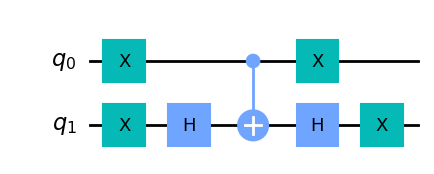

In [12]:
import qiskit
from qiskit import QuantumCircuit

reflection_n_2 = QuantumCircuit(2)
reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.h(1)
reflection_n_2.cx(0, 1)
reflection_n_2.h(1)

reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.draw('mpl')

this circuit translates the following operator: 1 - |00><00|

and thus the result is (1 - |00><00|)|q1>|q2>

We are seeking for a circuite that translates (1 - |0...0><0...0|)|q1>...|qn> with dimension n. To do so, we can try to generalize the circuit above, the generalisation gives the following circuit:


![reflection operator](reflection_operator.png)


We write a function that includes the pre and post hadamard gates now. We thus need a Grover operator that is applies to 5 qubits

In [13]:
def Grover_op(circuit, qreg_x):
    circuit.h(qreg_x[0])
    circuit.h(qreg_x[1])
    circuit.h(qreg_x[2])
    circuit.h(qreg_x[3])
    circuit.h(qreg_x[4])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[4])
    circuit.h(qreg_x[4])
    circuit.mcx(qreg_x[0:4], qreg_x[4])
    circuit.h(qreg_x[4])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[4])
    circuit.h(qreg_x[0])
    circuit.h(qreg_x[1])
    circuit.h(qreg_x[2])
    circuit.h(qreg_x[3])
    circuit.h(qreg_x[4])
    

We create a $G$ block to represent the grover operator such that $G = R \cdot U_f$

In [14]:
G = QuantumCircuit(12, name='G')
uf(G, [0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10], [11])
Grover_op(G, [0, 1, 2, 3, 4])

***Question 4:***


In [15]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

In [16]:
no_noise = AerSimulator()


In [17]:
#Our circuit will require 6 classical bits, to measure the 5 initial qubits and the 1 ancilla qubit taking y xor uf.
counts = {}
for i in range(1, 8):
    counts[i] = 0
circ = QuantumCircuit(12, 6)
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.h(4)
#State preparation is now done
for k in range(1, 8):
    circ = circ.compose(G)
    meas = circ
    meas.measure(0, 0)
    meas.measure(1, 1)
    meas.measure(2, 2)
    meas.measure(3, 3)
    meas.measure(4, 4)
    meas.measure(11, 5)
    meas = transpile(meas, no_noise)
    result = no_noise.run(meas, shots=1024).result()
    counts[k] = result.get_counts(0)

In [18]:
print(counts)

{1: {'111001': 1, '110100': 1, '111101': 2, '111011': 2, '100100': 1, '001011': 107, '001001': 26, '011011': 27, '110110': 2, '001111': 11, '101010': 24, '100010': 2, '111110': 1, '100000': 4, '010000': 23, '100110': 1, '010010': 23, '011001': 23, '110111': 1, '010011': 18, '001110': 21, '000010': 15, '000111': 15, '010100': 22, '011101': 22, '000000': 22, '000101': 21, '010101': 25, '001010': 111, '001100': 22, '101000': 23, '011000': 25, '011100': 18, '101111': 3, '010111': 14, '010110': 20, '010001': 18, '110010': 1, '101011': 24, '000110': 21, '011111': 16, '001000': 115, '111010': 1, '100011': 4, '001101': 20, '000100': 25, '000001': 18, '011010': 15, '101100': 2, '000011': 18, '011110': 27}, 2: {'101001': 1, '111111': 2, '100010': 3, '111000': 3, '111011': 1, '111101': 3, '101101': 2, '110011': 4, '110101': 2, '001111': 24, '110110': 2, '110100': 2, '101110': 2, '011111': 19, '101000': 94, '001100': 23, '001011': 19, '011011': 21, '001001': 22, '110000': 4, '100100': 3, '011110':

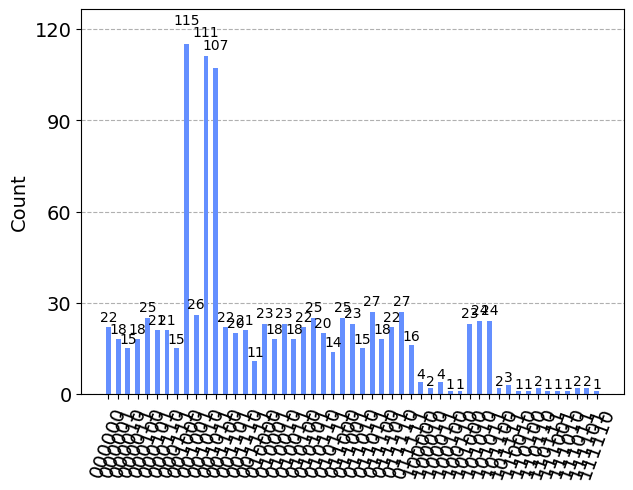

In [19]:
plot_histogram(counts[1])

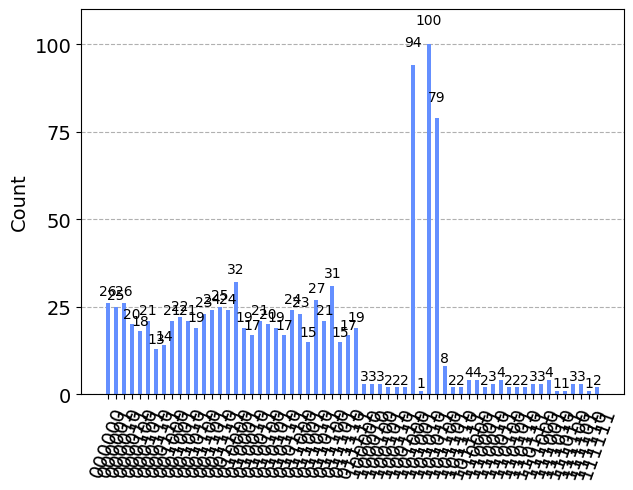

In [20]:
plot_histogram(counts[2])

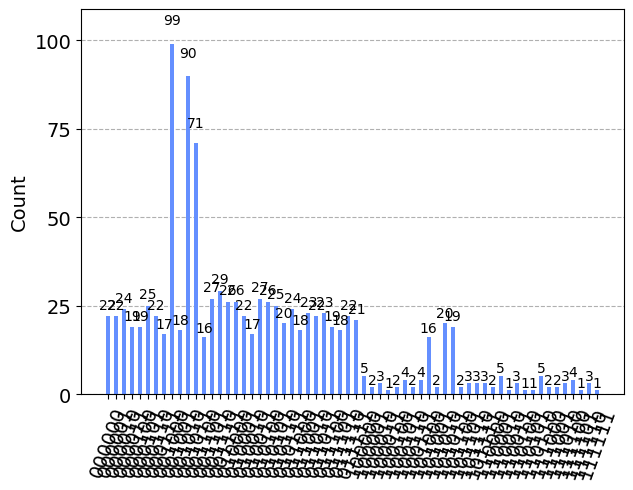

In [21]:
plot_histogram(counts[3])

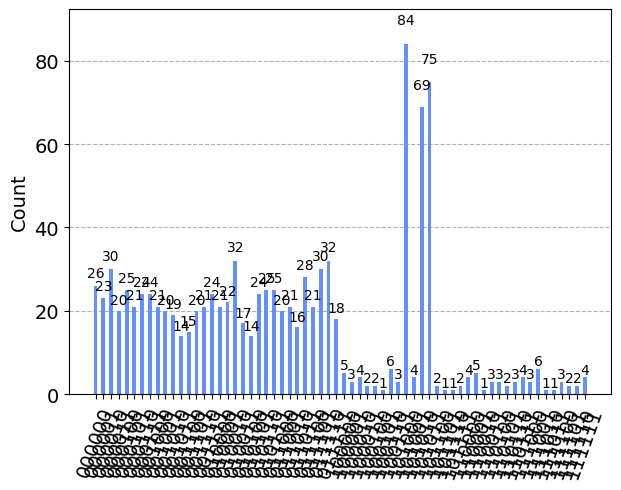

In [22]:
plot_histogram(counts[4])

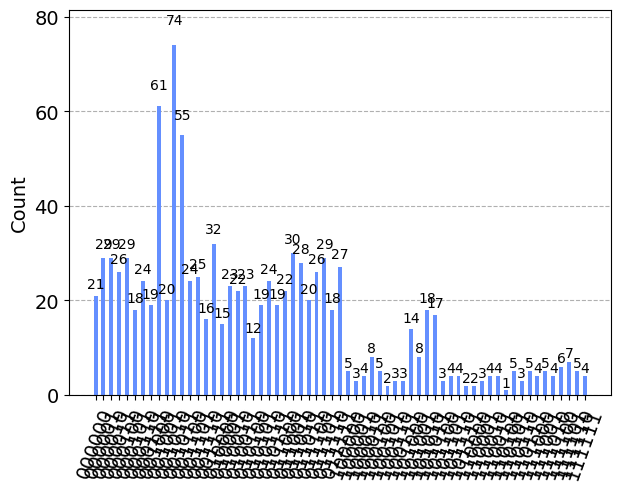

In [23]:
plot_histogram(counts[5])

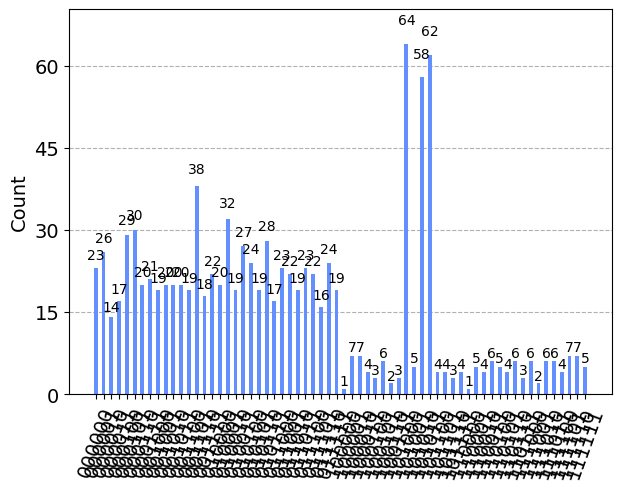

In [24]:
plot_histogram(counts[6])

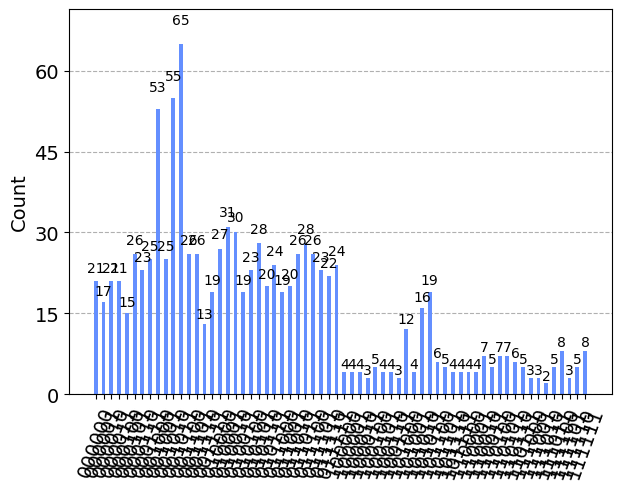

In [25]:
plot_histogram(counts[7])

It is very difficult to decipher much from these graphs, as there are 32 possibilities along the x axis, making it hard to read. We can however see that in general there are 3 states that have been measured each time. We will try to bring these out

In [26]:
for i in counts.keys():
    print(i, ":")
    lis = []
    for j in counts[i].keys():
        lis.append(counts[i][j])
    lis = sorted(lis)
    lis.reverse()
    for j in counts[i].keys():
        if counts[i][j] >= lis[2]:
            print(j)

1 :
001011
001010
001000
2 :
101000
101010
101011
3 :
001011
001000
001010
4 :
101000
101011
101010
5 :
001011
001000
001010
6 :
101000
101011
101010
7 :
001000
001011
001010


In [33]:
from qiskit.providers.fake_provider import FakeSherbrooke
device_backend = FakeSherbrooke()
noise = AerSimulator.from_backend(device_backend)

In [36]:
#Our circuit will require 6 classical bits, to measure the 5 initial qubits and the 1 ancilla qubit taking y xor uf.
counts_noise = {}
for i in range(1, 5):
    counts_noise[i] = 0
circ1 = QuantumCircuit(12, 6)
circ1.h(0)
circ1.h(1)
circ1.h(2)
circ1.h(3)
circ1.h(4)
#State preparation is now done
for k in range(1, 5):
    circ1 = circ1.compose(G)
    meas = circ1
    meas.measure(0, 0)
    meas.measure(1, 1)
    meas.measure(2, 2)
    meas.measure(3, 3)
    meas.measure(4, 4)
    meas.measure(11, 5)
    print("hi")
    meas = transpile(meas, noise)
    print("hi")
    result = noise.run(meas, shots=1024).result()
    counts_noise[k] = result.get_counts(0)

hi
hi
hi
hi
hi
hi
hi
hi


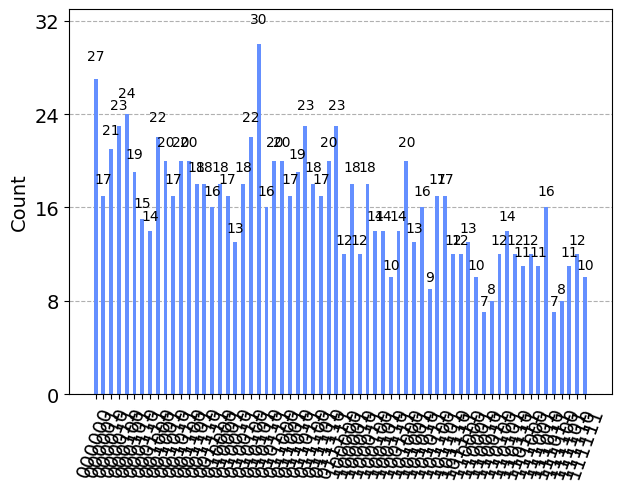

In [37]:
plot_histogram(counts_noise[1])

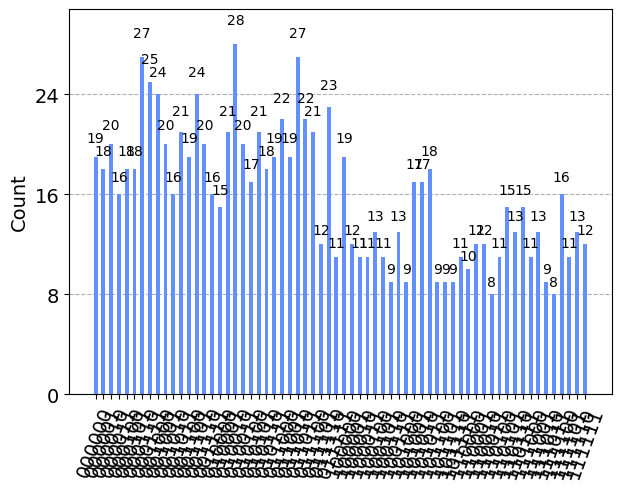

In [38]:
plot_histogram(counts_noise[2])

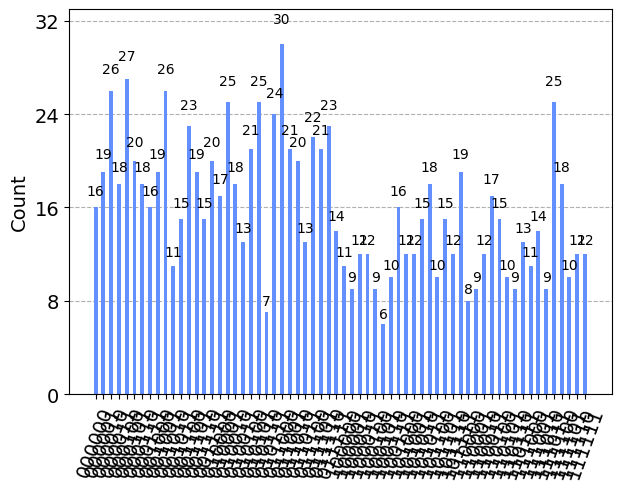

In [39]:
plot_histogram(counts_noise[3])

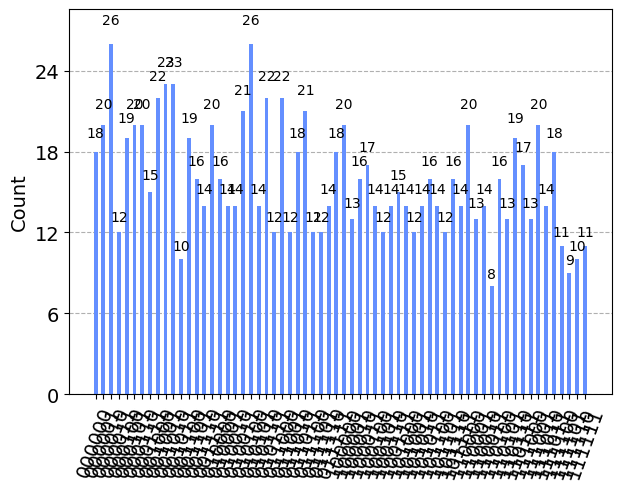

In [40]:
plot_histogram(counts_noise[4])

The noisy simulations were only done with $k$ going up to 4 iterations of the grover algorithm, as the time for each extra iteration basically doubles. The noisy simulation makes it more or less appear as if there are 2-3 outliers each round whereas the rest is very difficult to keep apart

***Question 5:***